<a href="https://colab.research.google.com/github/allnlk/NM/blob/main/%D0%9A%D1%83%D0%B1%D1%80%D0%B0%D0%BA_%D0%90_%D0%9F%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%B4%D0%BE_%D1%82%D0%B5%D0%BC%D0%B8_%C2%AB%D0%90%D0%BF%D1%80%D0%BE%D0%BA%D1%81%D0%B8%D0%BC%D0%B0%D1%86%D1%96%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D1%96%D0%B9%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 1.Інтерполяційний багаточлен для всіх вузлів таблиці


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6], dtype=float)
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511], dtype=float)

def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n)
    for i in range(n):
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p)

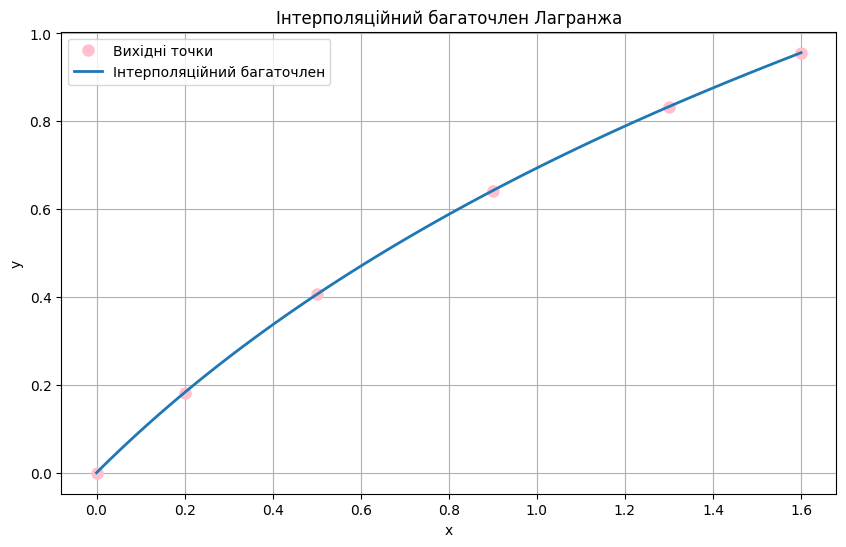

In [30]:
xnew = np.linspace(np.min(x), np.max(x), 100)
ynew = [lagrange_interpolation(x, y, i) for i in xnew]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Вихідні точки', markersize=8, color='pink')
plt.plot(xnew, ynew, label='Інтерполяційний багаточлен', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяційний багаточлен Лагранжа')
plt.grid(True)
plt.legend()
plt.show()


2.Інтерполяційний багаточлен Ньютона з використанням таблиці кінцевих функцій.

In [20]:
from math import factorial

In [27]:
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6], dtype=float)
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511], dtype=float)

def newton_divided_differences(x, y, x0):
    n = len(x)

    f = np.zeros((n, n))
    f[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])


    result = f[0, 0]
    product = 1

    for i in range(1, n):
        product *= (x0 - x[i-1])
        result += f[0, i] * product

    return result

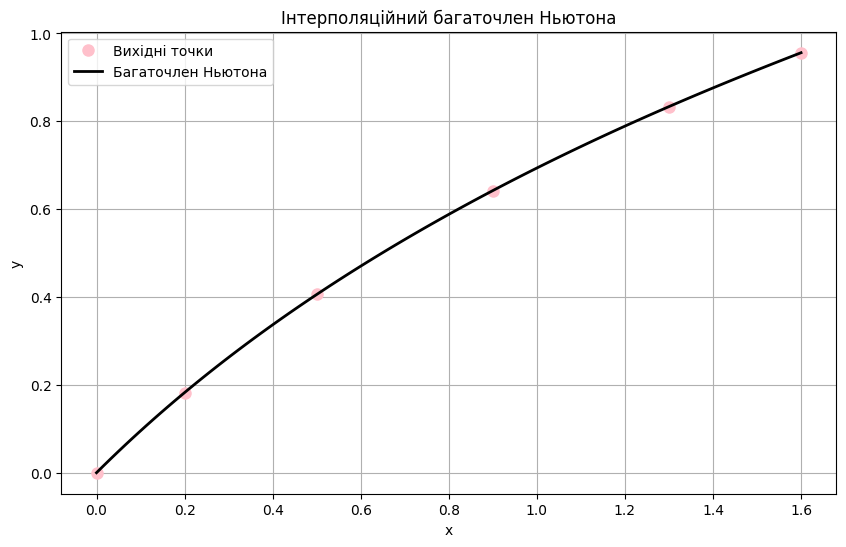

In [28]:
xnew = np.linspace(np.min(x), np.max(x), 100)
ynew_newton = [newton_divided_differences(x, y, i) for i in xnew]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Вихідні точки', markersize=8, color='pink')
plt.plot(xnew, ynew_newton, label='Багаточлен Ньютона', color='black', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяційний багаточлен Ньютона')
plt.grid(True)
plt.legend()
plt.show()

3.Ряд Тейлора 3-го порядку  для аналітичної функції.

In [31]:
import sympy as sp

In [32]:
x_data = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6], dtype=float)
y_data = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511], dtype=float)

x_sym = sp.symbols('x')
f = sp.log(x_sym + 1)  # ln(x+1)


f1 = sp.diff(f, x_sym)
f2 = sp.diff(f1, x_sym)
f3 = sp.diff(f2, x_sym)

print(f"f(x) = {f}")
print(f"f'(x) = {f1}")
print(f"f''(x) = {f2}")
print(f"f'''(x) = {f3}")


x0 = 0
f_x0 = f.subs(x_sym, x0)
f1_x0 = f1.subs(x_sym, x0)
f2_x0 = f2.subs(x_sym, x0)
f3_x0 = f3.subs(x_sym, x0)

print(f"f(0) = {f_x0}")
print(f"f'(0) = {f1_x0}")
print(f"f''(0) = {f2_x0}")
print(f"f'''(0) = {f3_x0}")

T3 = f_x0 + f1_x0*x_sym + (f2_x0/2)*x_sym**2 + (f3_x0/6)*x_sym**3
print(f"\nПоліном Тейлора 3-го порядку:")
print(f"T3(x) = {T3}")


f(x) = log(x + 1)
f'(x) = 1/(x + 1)
f''(x) = -1/(x + 1)**2
f'''(x) = 2/(x + 1)**3
f(0) = 0
f'(0) = 1
f''(0) = -1
f'''(0) = 2

Поліном Тейлора 3-го порядку:
T3(x) = x**3/3 - x**2/2 + x


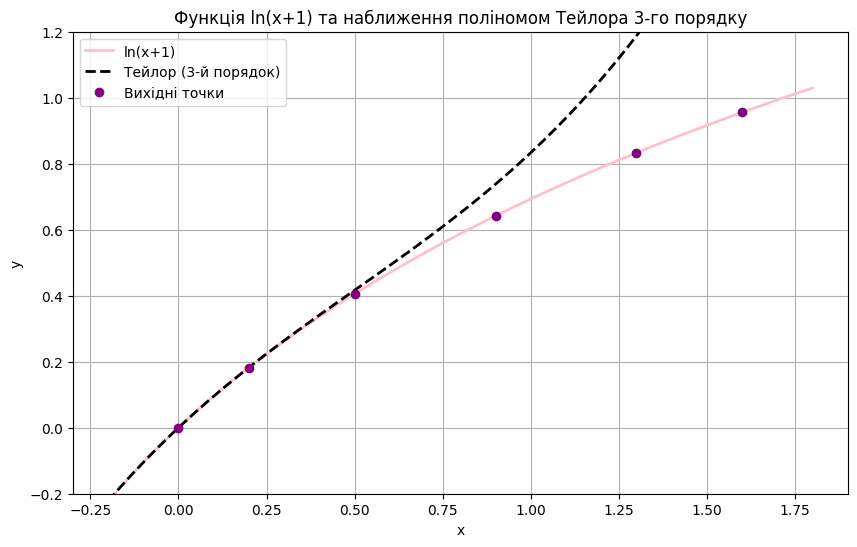

In [33]:
f_func = sp.lambdify(x_sym, f, 'numpy')
T3_func = sp.lambdify(x_sym, T3, 'numpy')

x_vals = np.linspace(-0.2, 1.8, 100)
f_vals = f_func(x_vals)
T3_vals = T3_func(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='ln(x+1)', linewidth=2, color='pink')
plt.plot(x_vals, T3_vals, label='Тейлор (3-й порядок)', linestyle='--', linewidth=2, color='black')
plt.plot(x_data, y_data, 'o', label='Вихідні точки', markersize=6, color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Функція ln(x+1) та наближення поліномом Тейлора 3-го порядку')
plt.grid(True)
plt.legend()
plt.ylim(-0.2, 1.2)
plt.show()

4.Kубічний сплайн

In [34]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, y)

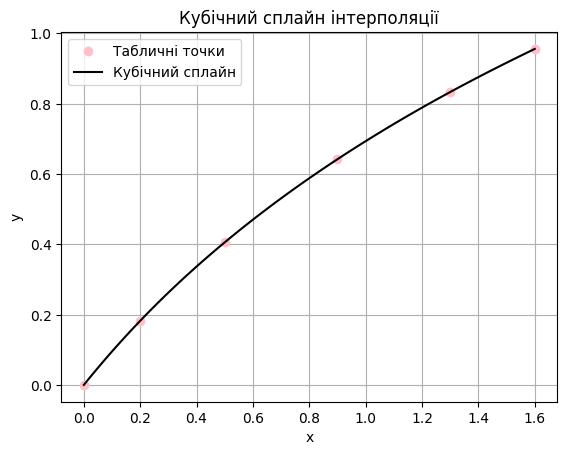

In [36]:
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

plt.plot(x, y, 'o', label='Табличні точки', color='pink')
plt.plot(x_new, y_new, label='Кубічний сплайн', color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн інтерполяції')
plt.legend()
plt.grid(True)
plt.show()